In [1]:
#Interpreting PDFs

#Consider the PDF shown to the right (it may take a second to load!). Which of the following is true?

<img src='Interpreting PDFs.svg'>

In [2]:
#Possible Answers

#x is more likely to be less than 10 than to be greater than 10.*

#x is more likely to be greater than 10 than to be less than 10.

#We cannot tell from the PDF if x is more likely to be greater than or less than 10.

#This is not a valid PDF because it has two peaks.

In [3]:
#NOTE: The probability is given by the area under the PDF.

In [4]:
#Interpreting CDFs

#At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability
#that  is greater than 10?

<img src='Interpreting CDFs.svg'>

In [5]:
#Possible Answers

#0.25*

#0.75

#3.75

#15

In [6]:
#The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75.
#Thus, the probability that x > 10 is 0.25.

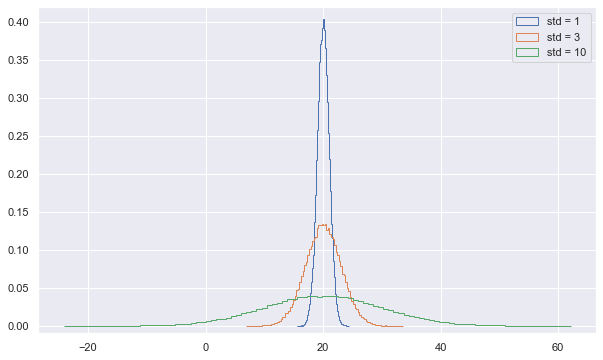

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))
np.random.seed(42)

#The Normal PDF

#In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker
#statistics. Specifically, you will plot a Normal PDF for various values of the variance.

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step') #normed=True -> density=True
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [8]:
#Different standard deviations result in PDFs of different widths.
#The peaks are all centered at the mean of 20.

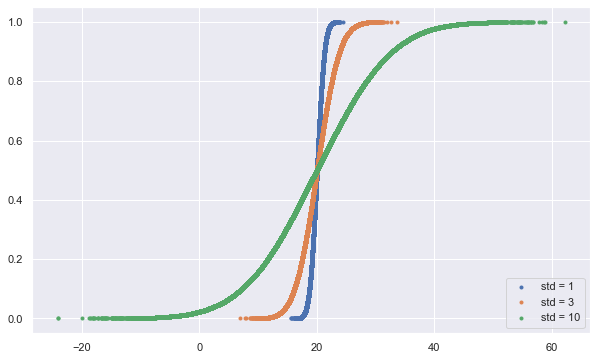

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
plt.figure(figsize=(10,6))

#The Normal CDF

#Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last
#exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

In [10]:
#The mean and median of a Normal distribution are equal.
#The width of the CDF varies with the standard deviation.

In [11]:
#Gauss and the 10 Deutschmark banknote

#What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark
#banknote, shown to the right?

<img src='10 Deutschmark banknote.svg'>

In [12]:
#Possible Answers

#mean = 3, std = 1*

#mean = 3, std = 2

#mean = 0.4, std = 1

#mean = 0.6, std = 6

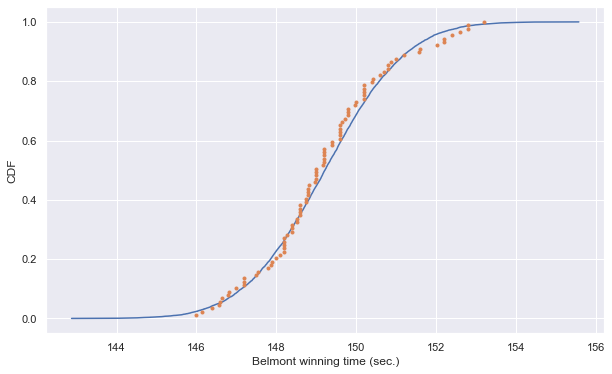

In [13]:
import pandas as pd
belmont = pd.read_csv('datasets/belmont.csv')
belmont['Time'] = pd.to_datetime(belmont['Time'], format="%M:%S.%f")
belmont['Time_seconds'] = belmont['Time'].dt.minute*60 + belmont['Time'].dt.second + \
                          belmont['Time'].dt.microsecond*0.000001
belmont_seconds = belmont['Time_seconds'].values
belmont_no_outliers = belmont_seconds.copy()
belmont_no_outliers = np.delete(belmont_no_outliers, np.argmax(belmont_no_outliers))
belmont_no_outliers = np.delete(belmont_no_outliers, np.argmin(belmont_no_outliers))
plt.figure(figsize=(10,6))
np.random.seed(42)

#Are the Belmont Stakes results Normally distributed?

#Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest
#Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and
#sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the
#Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the
#np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally
#distributed?

#Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [14]:
np.random.seed(42)

#What are the chances of a horse matching or beating Secretariat's record?

#Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the
#probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = (samples <= 144).sum() / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000593


In [15]:
#Matching a story and a distribution

#How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we
#considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability
#distribution of the time between no hitters.

#Possible Answers

#Normal

#Exponential*

#Poisson

#Uniform

In [16]:
#Waiting for the next Secretariat

#Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a
#performance like that? To answer this, you are interested in how many years you would expect to wait until you see another
#performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's
#distributed? Choose the best answer.

#Possible Answers

#Normal, because the distribution of Belmont winning times are Normally distributed.

#Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.

#Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero
#for high waiting time.

#Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting
#time between arrivals of a Poisson process is Exponentially distributed.*

In [17]:
#If you have a story, you can simulate it!

#Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In
#these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

#In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter
#gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a
#Poisson process, so the time between hits of the cycle are also Exponentially distributed.

#How long must we wait to see a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for
#the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total
#waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited
#for the no-hitter, plus the time waited for the hitting the cycle.

#Now, you will write a function to sample out of the distribution described by this story.

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

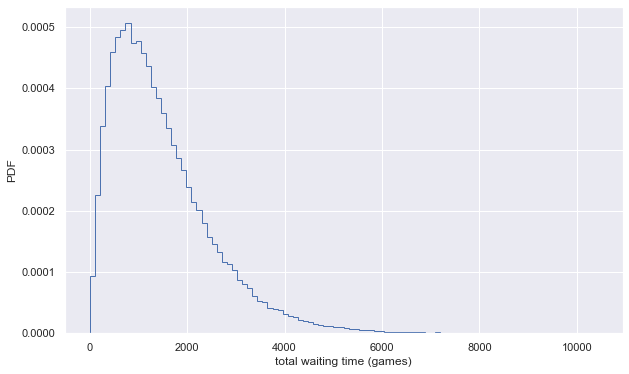

In [18]:
plt.figure(figsize=(10,6))
np.random.seed(42)

#Distribution of no-hitters and cycles

#Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The
#mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [19]:
#Notice that the PDF is peaked, unlike the waiting time for a single Poisson process.